<a href="https://colab.research.google.com/github/Whatthe-we/AIFFEL_quest_cr/blob/master/%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C(%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
#4-23
from tensorflow.keras.datasets import boston_housing
import numpy as np
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

#4-24
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#4-25
def bulid_model():
  model = keras.Sequentail(([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ]))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

#4-26
  k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]

  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis=0)
partial_train_targets = np. concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=16, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [ ]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 4-23 데이터셋 로드
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 4-24 데이터 전처리: train_data와 test_data를 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# 4-25 모델 정의
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

# 4-26 교차 검증
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i + 1}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비 (검증 데이터를 제외한 나머지 데이터)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 모델 학습
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)

    # 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중
#4번째 폴드 처리중


In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1)* num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0)

partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=16, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

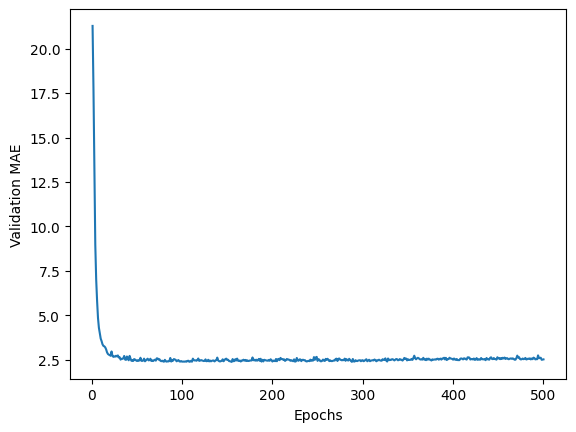

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

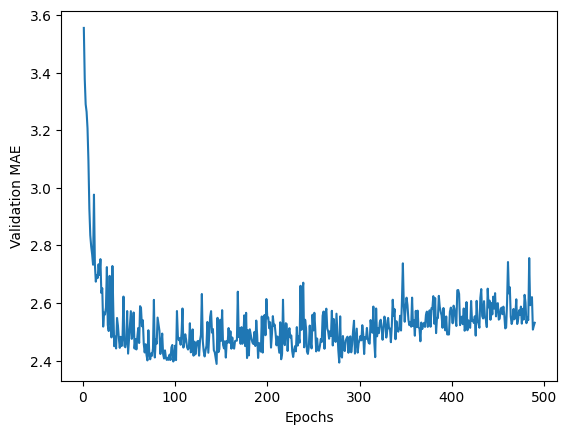

In [ ]:
truncated_mae_history = average_mae_history[10:]  # 수정된 부분: 변수명 수정
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6065 - mae: 2.2549 


In [ ]:
test_mae_score

2.4302611351013184

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([9.252098], dtype=float32)